In [1]:
%pip install pandas
%pip install os
import pandas as pd
import os

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/mekeys/.local/lib/python3.9/site-packages
sysconfig: /home/mekeys/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.


In [2]:
full_train_df = pd.read_csv('train2023.csv')
full_test_df = pd.read_csv('test_ids.csv')

img_dir = '/central/groups/CS156b/2025/CodeMonkeys'

full_train_df['full_path'] = full_train_df['Path'].apply(lambda x: os.path.join(img_dir, x))

print(full_train_df)


        Unnamed: 0.1  Unnamed: 0  \
0                  0           0   
1                  1           1   
2                  2           2   
3                  3           3   
4                  4           4   
...              ...         ...   
178153        178153      223409   
178154        178154      223410   
178155        178155      223411   
178156        178156      223412   
178157        178157      223413   

                                                     Path     Sex  Age  \
0                 train/pid50512/study1/view1_frontal.jpg  Female   68   
1                 train/pid21580/study2/view1_frontal.jpg  Female   87   
2                 train/pid21580/study1/view1_frontal.jpg  Female   83   
3                 train/pid21580/study1/view2_lateral.jpg  Female   83   
4                 train/pid33839/study1/view1_frontal.jpg    Male   41   
...                                                   ...     ...  ...   
178153            train/pid16708/study2/view1_fro

In [3]:
print(full_train_df['Age'])

full_train_df['AgeGroup'] = pd.cut(full_train_df['Age'], bins=[0, 20, 40, 60, 70, 80, 90, 100], labels=['0–20', '21–40', '41–60', '61–70', '71–80', '81–90', '91–100'])


output_cols = ['No Finding', 'Pneumonia', 'Fracture', 'Pleural Effusion', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Pleural Other', 'Support Devices']  
full_train_df[output_cols] = full_train_df[output_cols].replace(-1, 0)

age_label_means = full_train_df.groupby('AgeGroup')[output_cols].mean()





0         68
1         87
2         83
3         83
4         41
          ..
178153    59
178154    59
178155     0
178156     0
178157     0
Name: Age, Length: 178158, dtype: int64


/tmp/ipykernel_2436099/1533294241.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_label_means = full_train_df.groupby('AgeGroup')[output_cols].mean()


In [4]:
print(full_train_df['Sex'])

full_train_df['SexGroup'] = pd.cut(full_train_df['Age'], bins=[0, 20, 40, 60, 70, 80, 90, 100], labels=['0–20', '21–40', '41–60', '61–70', '71–80', '81–90', '91–100'])

full_train_df[output_cols] = full_train_df[output_cols].replace(-1, 0)

sex_label_means = full_train_df.groupby('Sex')[output_cols].mean()





0         Female
1         Female
2         Female
3         Female
4           Male
           ...  
178153      Male
178154      Male
178155    Female
178156    Female
178157    Female
Name: Sex, Length: 178158, dtype: object


In [8]:
%pip install seaborn
%pip install matplotlib.pyplot

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 8.3 MB 55.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 55.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 68.0 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 82.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 68.2 MB/s eta 0:00:01
  distutils: /home/mekeys/.local/lib/python3.9/site-packages
  sysconfig: /home/mekeys/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Note: you may need t

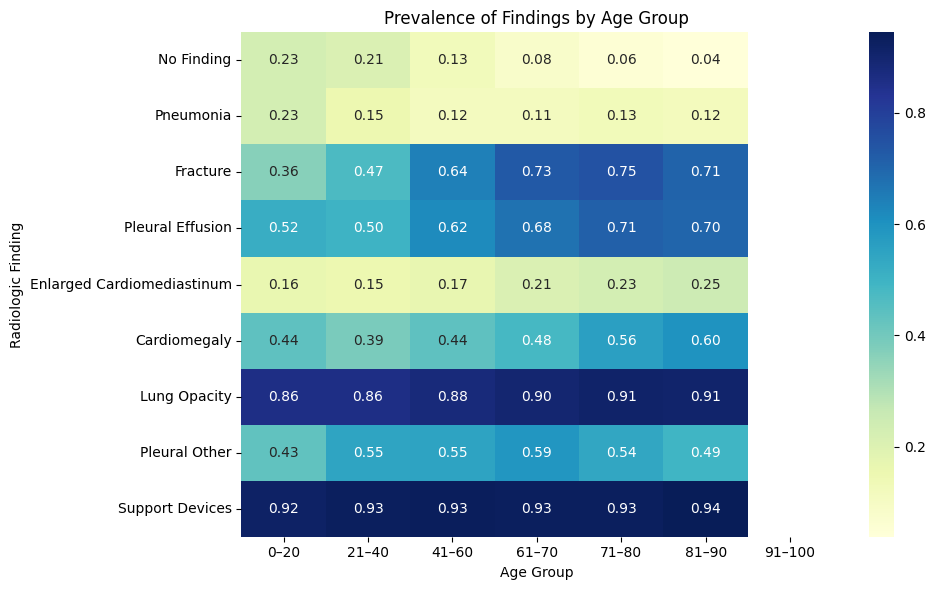

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(age_label_means.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Prevalence of Findings by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Radiologic Finding")
plt.tight_layout()
plt.show()

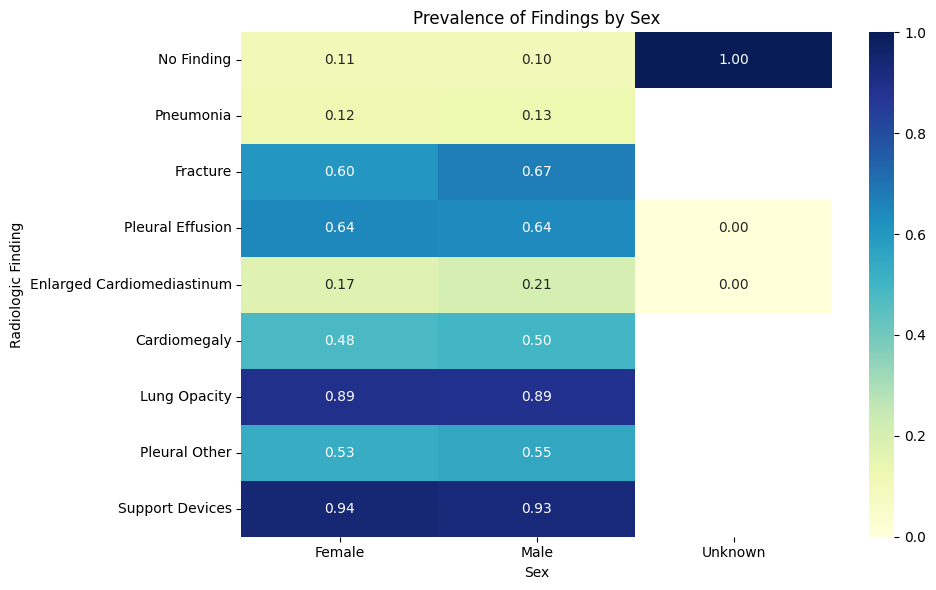

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(sex_label_means.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Prevalence of Findings by Sex")
plt.xlabel("Sex")
plt.ylabel("Radiologic Finding")
plt.tight_layout()
plt.show()

Data Augmentation

In [1]:
%pip install torch
%pip install torchvision
%pip install torchvision.transforms

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 134 kB 5.9 MB/s eta 0:00:01
  distutils: /home/mekeys/.local/lib/python3.9/site-packages
  sysconfig: /home/mekeys/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/mekeys/.local/lib/python3.9/site-packages
sysconfig: /home/mekeys/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement torchvision.transforms (from versions: none)
ERROR: No matching distribution found for torchvision.transforms
Note: you may need to restart the kernel 

In [1]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import os
import numpy as np



class XrayDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform
        self.label_map = {label: idx for idx, label in enumerate(self.df['Path'].unique())}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'Path']
        image = Image.open(img_path).convert("L")
        label = self.label_map[self.df.loc[idx, 'Path']]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label


In [3]:
full_train_df = pd.read_csv('train2023.csv')
train_dataset = XrayDataset(full_train_df, transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


NameError: name 'train_transforms' is not defined

In [11]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.02):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        return tensor + torch.randn_like(tensor) * self.std + self.mean

class AddPoissonNoise(object):
    def __call__(self, tensor):
        noisy = torch.poisson(tensor * 255.0) / 255.0
        return torch.clamp(noisy, 0., 1.)

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(contrast=0.2, brightness=0.2),
    transforms.ToTensor(),
    AddGaussianNoise(0., 0.02),
    AddPoissonNoise()
])


Code to run base model on 1000 images

In [4]:
!pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/mekeys/.local/lib/python3.9/site-packages
sysconfig: /home/mekeys/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [14]:
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from PIL import Image
import os
import pandas as pd
import torch.optim as optim


In [21]:
from torchvision import transforms

def __getitem__(self, idx):
    row = self.data.iloc[idx]
    image_index = idx
    saved_image_path = os.path.join(self.save_dir, f"{image_index}.pt")

    if self.use_saved_images:
        if os.path.exists(saved_image_path):
            image_tensor = torch.load(saved_image_path)
        else:
            raise FileNotFoundError(f"Saved tensor not found: {saved_image_path}")
    else:
        # ✅ Convert grayscale image to 3-channel RGB
        original_image_path = os.path.join(self.image_root_dir, row['Path'])
        image = Image.open(original_image_path).convert("RGB")  # <-- force RGB

        # ✅ Resize to 224x224 for ResNet
        image = image.resize((224, 224))

        # ✅ Convert to tensor and normalize for ResNet pretrained weights
        image_tensor = transforms.ToTensor()(image)
        image_tensor = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )(image_tensor)

        # Optional: Save tensor
        if self.save_dir:
            torch.save(image_tensor, saved_image_path)

    if self.target_columns:
        labels = pd.to_numeric(row[self.target_columns], errors='coerce').fillna(0).astype(float).values
        labels = torch.tensor(labels, dtype=torch.float32)
        return image_tensor, labels

    return image_tensor





In [22]:
image_root = '/central/groups/CS156b/2025/CodeMonkeys/input_images'
image_root_dir = "input_images/train"
train_save_dir = os.path.join(image_root, 'train')
#test_save_dir = os.path.join(image_root, 'test')
full_train_df = pd.read_csv('train2023.csv')
filtered_train_df = full_train_df.iloc[:1000]




In [26]:
import torch.nn as nn
from torchvision import models

class MultiLabelResNet50(nn.Module):
    def __init__(self, num_classes, freeze_base=False):
        super(MultiLabelResNet50, self).__init__()
        self.base_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

        # 🔧 Replace first conv layer to accept 1-channel input instead of 3
        self.base_model.conv1 = nn.Conv2d(
            in_channels=1,       # 🟡 1 input channel instead of 3
            out_channels=64,
            kernel_size=7,
            stride=2,
            padding=3,
            bias=False
        )

        # (Optional) Freeze all pretrained layers except final FC
        if freeze_base:
            for param in self.base_model.parameters():
                param.requires_grad = False

        # 🧠 Classification head for multi-label
        self.base_model.fc = nn.Sequential(
            nn.Linear(self.base_model.fc.in_features, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.base_model(x)


In [27]:
# Create dataset
train_dataset = CSVDataset(
    dataframe=filtered_train_df, 
    image_root_dir=image_root, 
    target_columns=["No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity",
    "Pneumonia", "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices"], 
    #transform=image_transforms,  # Pass the transform
    save_dir=train_save_dir, 
    use_saved_images=True  # Set to True if you want to load tensors from CSV
)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Iterate through batches
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Do your training here

Batch 1
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 2
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 3
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 4
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 5
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 6
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 7
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 8
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 9
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 10
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 11
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 12
Images shape: torch.Size([32, 1, 224, 224])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 9  # Adjust based on your number of labels
model = MultiLabelResNet50(num_classes=num_classes, freeze_base=False).to(device)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for multi-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training Loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Optional: compute accuracy metrics
        predicted = torch.sigmoid(outputs) > 0.5  # Multi-label classification
        correct += (predicted == labels).sum().item()
        total += labels.numel()

    avg_loss = running_loss / len(train_loader)
    accuracy = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
    
    # Optionally, save the model
    torch.save(model.state_dict(), f"model_epoch_{epoch+1}.pth")


In [ ]:
# Create dataset
train_dataset = CSVDataset(
    dataframe=filtered_train_df, 
    image_root_dir=image_root, 
    target_columns=["No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity",
    "Pneumonia", "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices"], 
    #transform=image_transforms,  # Pass the transform
    save_dir=train_save_dir, 
    use_saved_images=True  # Set to True if you want to load tensors from CSV
)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Iterate through batches
for batch_idx, (images, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Do your training here

Batch 1
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 2
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 3
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 4
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 5
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 6
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 7
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 8
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 9
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 10
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 11
Images shape: torch.Size([32, 1, 224, 224])
Labels shape: torch.Size([32, 9])
Batch 12
Images shape: torch.Size([32, 1, 224, 224])

In [ ]:
# Create dataset
test_dataset = CSVDataset(
    dataframe=df_first10rows_test, 
    image_root_dir=image_root, 
    target_columns=None, 
    transform=image_transforms,  # Pass the transform
    save_dir=test_save_dir, 
    use_saved_images=False  # Set to True if you want to load tensors from CSV
)

# Create DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Iterate through batches
for batch_idx, (images) in enumerate(test_loader):
    print(f"Batch {batch_idx + 1}")
    print("Images shape:", images.shape)